In [26]:
import numpy as np
import pandas as pd
import io
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import time
import datetime
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn import cluster
from scipy.spatial import distance
import sklearn.datasets
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

In [27]:
url = 'https://raw.githubusercontent.com/MSPawanRanjith/FileTransfer/master/kmean_dataset.csv'
s=requests.get(url).content
df = pd.read_csv(io.StringIO(s.decode('utf-8')))


In [28]:
df.head()

,0,1,2
0,5.1,3.5,1.4
1,4.9,3.0,1.4
2,4.7,3.2,1.3
3,4.6,3.1,1.5
4,5.0,3.6,1.4


In [29]:
X=df.values
from sklearn.preprocessing import MinMaxScaler
X=sklearn.preprocessing.normalize(X)


[327.45768371637865, 807.7900764613017, 847.2306677986486, 843.4926787815223, 842.4299111937826, 836.3722719720306, 834.4230435156152, 826.490288185961, 828.7355028156614]
   BIC values  Cluster_no
0  327.457684           1
1  807.790076           2
2  847.230668           3
3  843.492679           4
4  842.429911           5
5  836.372272           6
6  834.423044           7
7  826.490288           8
8  828.735503           9


Text(0, 0.5, '# BIC')

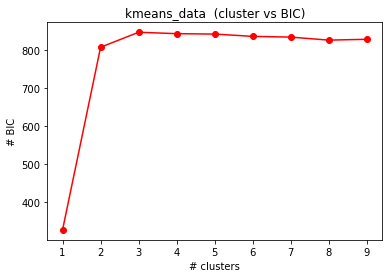

In [32]:
from sklearn import cluster
from scipy.spatial import distance
import sklearn.datasets
from sklearn.preprocessing import StandardScaler
import numpy as np

def compute_bic(kmeans,X):

    # assign centers and labels
    centers = [kmeans.cluster_centers_]
    labels  = kmeans.labels_
    #number of clusters
    m = kmeans.n_clusters
    # size of the clusters
    n = np.bincount(labels)
    #size of data set
    N, d = X.shape

    #compute variance for all clusters beforehand
    cl_var = (1.0 / (N - m) / d) * sum([sum(distance.cdist(X[np.where(labels == i)], [centers[0][i]], 
             'euclidean')**2) for i in range(m)])

    const_term = 0.5 * m * np.log(N) * (d+1)

    BIC = np.sum([n[i] * np.log(n[i]) -
               n[i] * np.log(N) -
             ((n[i] * d) / 2) * np.log(2*np.pi*cl_var) -
             ((n[i] - 1) * d/ 2) for i in range(m)]) - const_term

    return(BIC)





ks = range(1,10)

# run 9 times kmeans and save each result in the KMeans object
KMeans = [cluster.KMeans(n_clusters = i, init="k-means++").fit(X) for i in ks]

# now run for each cluster the BIC computation
BIC = [compute_bic(kmeansi,X) for kmeansi in KMeans]

print(BIC)
df = pd.DataFrame (BIC, columns = ['BIC values'],index=ks)
df.reset_index(drop=True,inplace=True)
df['Cluster_no']=ks
print(df.iloc[:,:])

plt.plot(ks,BIC,'r-o')
plt.title("kmeans_data  (cluster vs BIC)")
plt.xlabel("# clusters")
plt.ylabel("# BIC")


In [35]:
def find_local_max(o):
    m=argrelextrema(o, np.greater)
    l=[]
    for i in m:
        l.append(i)
    print("Local maxima :",l)
    print("The maximum BIC value is at cluster number",max(*l)+1) #the index starts from 0, so 3rd cluster is at 2nd index
    
import numpy as np
from scipy.signal import argrelextrema
o=np.array(BIC)

find_local_max(o)


      
    


Local maxima : [array([2], dtype=int64)]
The maximum BIC value is at cluster number 3


In [37]:
from sklearn.cluster import KMeans

In [40]:
kmeans3 = KMeans(n_clusters = 3, init = 'k-means++', random_state = 0)
x1=kmeans3.fit_predict(X)
labels3 = kmeans3.labels_

In [41]:
estimator = KMeans(n_clusters=3)
estimator.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

Text(0.5, 0.92, 'K Means')

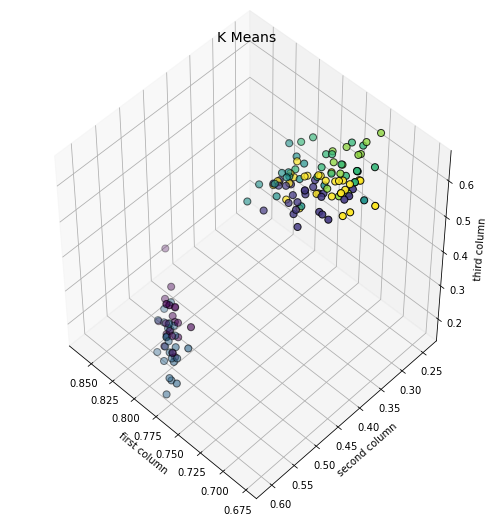

In [42]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1, figsize=(7,7))
ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48, azim=134)
ax.scatter(X[:, 0], X[:, 1], X[:, 2],
c=labels6.astype(np.float), edgecolor="k", s=50)

ax.set_xlabel("first column")
ax.set_ylabel("second column")
ax.set_zlabel("third column")
plt.title("K Means", fontsize=14)

The centroid values are as follows:
[[0.80185495 0.54775757 0.23462266]
 [0.7222408  0.33055182 0.60618056]
 [0.76501071 0.35406432 0.5365151 ]]


Text(0, 0.5, 'Column 2')

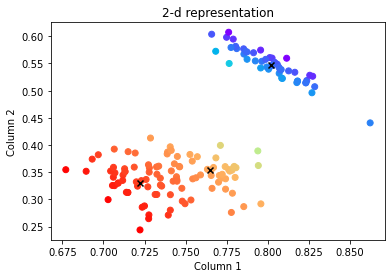

In [43]:
centroids = kmeans3.cluster_centers_
print('The centroid values are as follows:')
print(centroids)
plt.scatter(X[:,0],X[:,1],c=X[:,2],cmap='rainbow')
plt.scatter(centroids[:,0] ,centroids[:,1], color='black', marker='x')
plt.title('2-d representation')
plt.xlabel('Column 1')
plt.ylabel('Column 2')



Text(0.5, 0.92, 'K Means')

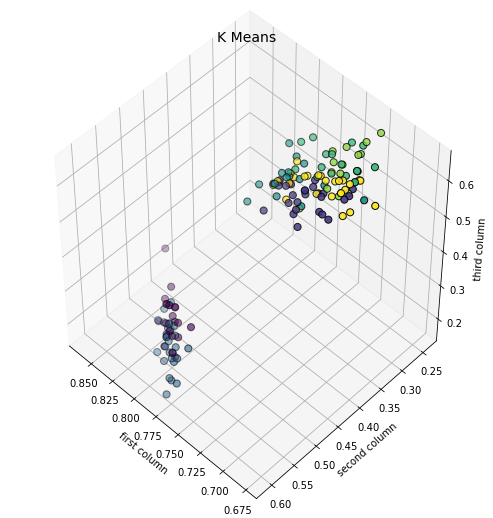

In [44]:
centroids = kmeans3.cluster_centers_
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1, figsize=(7,7))

ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48, azim=134)
ax.scatter(centroids[:,0] ,centroids[:,1],centroids[:,2], color='red', marker='X')
ax.scatter(X[:, 0], X[:, 1], X[:, 2],
c=labels6.astype(np.float), edgecolor="k", s=50)


ax.set_xlabel("first column")
ax.set_ylabel("second column")
ax.set_zlabel("third column")

plt.title("K Means", fontsize=14)